In [63]:
import gdown
from pathlib import Path
# import matplotlib as plt
# %matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import re
import warnings
warnings.filterwarnings('ignore')

# raw data

In [19]:
# import raw data
def download_from_gdrive(url, filename):
    file_id = url.split('/')[-2]
    download_url = f"https://drive.google.com/uc?id={file_id}"
    if Path(filename).exists():
        print(f"File '{filename}' already exists. Skipping download.")
    else:
        gdown.download(download_url, filename, quiet=False)
        print(f"File downloaded as: {filename}")

US_Accidents_url = 'https://drive.google.com/file/d/11OZ7yANWhGUbCQHzG7Jea63ukozOOH8N/view?usp=sharing'

download_from_gdrive(US_Accidents_url, 'US_Accidents_March23_sampled_500k.csv')

df = pd.read_csv('US_Accidents_March23_sampled_500k.csv')

File 'US_Accidents_March23_sampled_500k.csv' already exists. Skipping download.


In [20]:
df1 = df.copy()
df1.shape

(500000, 46)

In [21]:
df1.describe()

Severity      Start_Lat      Start_Lng        End_Lat  \
count  500000.000000  500000.000000  500000.000000  279623.000000   
mean        2.212748      36.206421     -94.736583      36.273192   
std         0.486661       5.071411      17.405761       5.265333   
min         1.000000      24.562117    -124.497420      24.570110   
25%         2.000000      33.416823    -117.233047      33.474773   
50%         2.000000      35.832147     -87.794365      36.192669   
75%         2.000000      40.082443     -80.359601      40.181341   
max         4.000000      48.999569     -67.484130      48.998901   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  279623.000000  500000.000000   489534.000000  370983.000000   
mean      -95.776553       0.564317       61.646254      58.229028   
std        18.120211       1.774872       19.000133      22.352246   
min      -124.497419       0.000000      -77.800000     -53.200000   
25%      -117.778324       0.000000       49.000000      43.000000   
50%       -88.039013       0.029000       64.000000      62.000000   
75%       -80.252449       0.465000       76.000000      75.000000   
max       -67.484130     193.479996      207.000000     207.000000   

         Humidity(%)   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  488870.000000  491072.000000   488709.000000    463013.000000   
mean       64.834921      29.536621        9.091540         7.681347   
std        22.826158       1.008666        2.708083         5.431361   
min         1.000000       0.120000        0.000000         0.000000   
25%        48.000000      29.370000       10.000000         4.600000   
50%        67.000000      29.860000       10.000000         7.000000   
75%        84.000000      30.030000       10.000000        10.400000   
max       100.000000      38.440000      130.000000       822.800000   

       Precipitation(in)  
count      357384.000000  
mean            0.008289  
std             0.101865  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            10.130000

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

# convert type

In [32]:
df2 = df1.copy()

In [33]:
# Convert bool to Int

def change_bool_to_int(df, bool_lst):
    for col in bool_lst:
        df[col] = df[col].astype(int)

bool_lst = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
            'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

change_bool_to_int(df2, bool_lst)
df2[bool_lst].dtypes

Amenity            int64
Bump               int64
Crossing           int64
Give_Way           int64
Junction           int64
No_Exit            int64
Railway            int64
Roundabout         int64
Station            int64
Stop               int64
Traffic_Calming    int64
Traffic_Signal     int64
Turning_Loop       int64
dtype: object

In [34]:
# Convert Obj to Str

def change_object_to_string(df, obj_lst):
    for col in obj_lst:
        df[col] = df[col].astype('string')

obj_lst = ['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County', 'State',
           'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
            'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

change_object_to_string(df2, obj_lst)
df2[obj_lst].dtypes

ID                       string[python]
Source                   string[python]
Start_Time               string[python]
End_Time                 string[python]
Description              string[python]
Street                   string[python]
City                     string[python]
County                   string[python]
State                    string[python]
Zipcode                  string[python]
Country                  string[python]
Timezone                 string[python]
Airport_Code             string[python]
Weather_Timestamp        string[python]
Wind_Direction           string[python]
Weather_Condition        string[python]
Sunrise_Sunset           string[python]
Civil_Twilight           string[python]
Nautical_Twilight        string[python]
Astronomical_Twilight    string[python]
dtype: object

In [35]:
# Clean punctuation in string columns

import string

def clean_string_punctuation(df, obj_lst):
    for col in obj_lst:
        df[col] = df[col].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if pd.notnull(x) else x)

            
filtered_lst = [elem for elem in obj_lst if elem != 'Start_Time' and elem != 'End_Time']                      
clean_string_punctuation(df2, filtered_lst)
change_object_to_string(df2, filtered_lst)
df2[filtered_lst].head()

ID   Source                                        Description  \
0  A2047758  Source2  Accident on LA19 BakerZachary Hwy at Lower Zac...   
1  A4694324  Source1  Incident on FOREST RIDGE DR near PEPPERIDGE PL...   
2  A5006183  Source1  Accident on W Central Ave from Floradale Ave t...   
3  A4237356  Source1  Incident on I90 EB near REST AREA Drive with c...   
4  A6690583  Source1  RP ADV THEY LOCATED SUSP VEH OF 20002  726 CRA...   

             Street         City            County State    Zipcode Country  \
0        Highway 19      Zachary  East Baton Rouge    LA  707914610      US   
1   Forest Ridge Dr     Sterling           Loudoun    VA  201642813      US   
2     Floradale Ave       Lompoc     Santa Barbara    CA      93436      US   
3        14th St NW       Austin             Mower    MN      55912      US   
4        River Blvd  Bakersfield              Kern    CA  933052649      US   

    Timezone Airport_Code Weather_Timestamp Wind_Direction Weather_Condition  \
0  USCentral         KBTR   20190612 095300             NW              Fair   
1  USEastern         KIAD   20221203 235200              W              Fair   
2  USPacific         KLPC   20220820 125600              W              Fair   
3  USCentral         KAUM   20220221 173500            ENE        Wintry Mix   
4  USPacific         KBFL   20201204 015400           CALM              Fair   

  Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0            Day            Day               Day                   Day  
1          Night          Night             Night                 Night  
2            Day            Day               Day                   Day  
3            Day            Day               Day                   Day  
4          Night          Night             Night                 Night

# additional preparation

In [36]:
df3 = df2.copy()
df3.shape

(500000, 46)

In [37]:
# Convert Start/End Time from String to Datetime

import re

def remove_digits_from_end(date_string):
    return re.sub(r'\.\d+$', '', date_string)

df3['Start_Time'] = df3['Start_Time'].apply(remove_digits_from_end)
df3['End_Time'] = df3['End_Time'].apply(remove_digits_from_end)

df3['Start_Time'] = pd.to_datetime(df3['Start_Time'], format="%Y-%m-%d %H:%M:%S")
df3['End_Time'] = pd.to_datetime(df3['End_Time'], format="%Y-%m-%d %H:%M:%S")

df3[['Start_Time', 'End_Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Start_Time  500000 non-null  datetime64[ns]
 1   End_Time    500000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.6 MB


In [45]:
# Create Duration and convert timedelta64[ns] to timedelta64[m]

df3['Duration'] = df3['End_Time'] - df3['Start_Time']
df3['Duration'] = df3['Duration'] / np.timedelta64(1, 'h')
df3['Duration'].head()

0    0.750556
1    2.327500
2    2.162500
3    2.005278
4    2.452500
Name: Duration, dtype: float64

In [46]:
# Create Month, Day, Hour

df3['month'] = df3['Start_Time'].dt.month
df3['day'] = df3['Start_Time'].dt.day
df3['hour'] = df3['Start_Time'].dt.hour
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     500000 non-null  string        
 1   Source                 500000 non-null  string        
 2   Severity               500000 non-null  int64         
 3   Start_Time             500000 non-null  datetime64[ns]
 4   End_Time               500000 non-null  datetime64[ns]
 5   Start_Lat              500000 non-null  float64       
 6   Start_Lng              500000 non-null  float64       
 7   End_Lat                279623 non-null  float64       
 8   End_Lng                279623 non-null  float64       
 9   Distance(mi)           500000 non-null  float64       
 10  Description            499999 non-null  string        
 11  Street                 499309 non-null  string        
 12  City                   499981 non-null  stri

In [47]:
# focus on year 2019

df4 = df3[df3['Start_Time'].dt.year == 2019]
df4.shape

(61852, 50)

In [48]:
# remove Start_Time, End_Time

df5 = df4.drop(['Start_Time', 'End_Time'], axis=1)
df5.shape

(61852, 48)

In [49]:
# dropping 16 columns

def drop_columns(df, drop_col_lst):
  for col in drop_col_lst:
    df.drop(col, axis=1, inplace=True)

drop_col_lst = ['Start_Lat'        #geographic           
                , 'Start_Lng'      #geographic 
                , 'End_Lat'        #geographic 
                , 'End_Lng'        #geographic 
                , 'Distance(mi)'   #78%=0.0
                , 'Country'        #all 'US'
                , 'Description'    #free text
                , 'Street'         #resolution
                , 'Zipcode'        #resolution
                , 'Timezone'       #no need
                , 'Airport_Code'   #no need
                , 'Weather_Timestamp' #no need
                , 'Wind_Direction' #drive direction unknown
                , 'Roundabout'     #all False
                , 'Turning_Loop'   #one single True
                , 'Civil_Twilight'    #no need
                , 'Nautical_Twilight' #no need
                , 'Astronomical_Twilight' #no need
               ]

drop_columns(df5, drop_col_lst)
df5.shape

(61852, 30)

# pickle

In [50]:
# Write a pickle file

import pickle

In [51]:
with open('df5.pkl', 'wb') as f:
    pickle.dump(df5, f)

print("df5 dataset saved as a pickle file.")

df5 dataset saved as a pickle file.


In [52]:
#Read a pickle file and load the data

with open('df5.pkl', 'rb') as file:
    loaded_df5 = pickle.load(file)

In [53]:
loaded_df5.shape

(61852, 30)

In [54]:
loaded_df5.head()

ID   Source  Severity         City            County State  \
0   A2047758  Source2         2      Zachary  East Baton Rouge    LA   
14  A2127689  Source2         2        Tempe          Maricopa    AZ   
30  A1722555  Source2         2       Denver            Denver    CO   
40  A2017804  Source2         2      Augusta          Richmond    GA   
51  A7296001  Source1         2  Minneapolis          Hennepin    MN   

    Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  ...  Railway  \
0             77.0           77.0         62.0         29.92  ...        0   
14            64.0           64.0         37.0         28.66  ...        0   
30            18.0           11.0         40.0         24.33  ...        0   
40            78.0           78.0         84.0         29.50  ...        0   
51            18.0            9.0         71.0         28.87  ...        0   

    Station  Stop Traffic_Calming  Traffic_Signal  Sunrise_Sunset  Duration  \
0         0     0               0               1             Day  0.750556   
14        0     0               0               1             Day  1.126389   
30        0     0               0               0           Night  0.520833   
40        0     0               0               1           Night  0.995833   
51        0     0               0               1           Night  0.884167   

    month  day  hour  
0       6   12    10  
14      5   28     7  
30     12   17     7  
40      8   12     5  
51     12   31    18  

[5 rows x 30 columns]

# part 1

In [56]:
df6 = loaded_df5.copy()

In [65]:
# Data protocol

import openpyxl

df6.dtypes.to_excel("Accidents_datatype.xlsx",sheet_name='data_type')
df6.max().to_excel("max_Accidents.xlsx", sheet_name='max')
df6.min().to_excel("min_Accidents.xlsx", sheet_name='min')
df6.isnull().sum(axis=0).to_excel("NA_Accidents.xlsx", sheet_name='NA')
df6.nunique().to_excel("unique_Accidents.xlsx", sheet_name='unique')

In [67]:
# Automated reports - NOT SUPPORTED IN CURRENT PYTHON VERSION

# !pip install dataprep
# from dataprep.eda import create_report
# import pandas as pd

# report = create_report(df6)
# report.show_browser()

In [68]:
df6.shape

(61852, 30)

In [69]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61852 entries, 0 to 499994
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 61852 non-null  string 
 1   Source             61852 non-null  string 
 2   Severity           61852 non-null  int64  
 3   City               61851 non-null  string 
 4   County             61852 non-null  string 
 5   State              61852 non-null  string 
 6   Temperature(F)     60799 non-null  float64
 7   Wind_Chill(F)      52388 non-null  float64
 8   Humidity(%)        60742 non-null  float64
 9   Pressure(in)       61017 non-null  float64
 10  Visibility(mi)     60707 non-null  float64
 11  Wind_Speed(mph)    58082 non-null  float64
 12  Precipitation(in)  47611 non-null  float64
 13  Weather_Condition  60722 non-null  string 
 14  Amenity            61852 non-null  int64  
 15  Bump               61852 non-null  int64  
 16  Crossing           61852 n

In [70]:
df6.describe()

Severity  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  61852.000000    60799.000000   52388.000000  60742.000000   
mean       2.310063       60.723489      60.094697     64.976392   
std        0.523333       19.485741      22.645303     22.709867   
min        1.000000      -27.900000     -53.200000      2.000000   
25%        2.000000       48.000000      45.000000     48.000000   
50%        2.000000       63.000000      64.000000     68.000000   
75%        3.000000       75.000000      77.000000     84.000000   
max        4.000000      115.000000     115.000000    100.000000   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
count  61017.000000    60707.000000     58082.000000       47611.000000   
mean      29.430581        9.080168         7.407772           0.006970   
std        1.100306        2.927134         5.250934           0.046538   
min       20.260000        0.000000         0.000000           0.000000   
25%       29.230000       10.000000         3.500000           0.000000   
50%       29.770000       10.000000         7.000000           0.000000   
75%       30.000000       10.000000        10.000000           0.000000   
max       31.120000      130.000000       142.000000           2.800000   

            Amenity          Bump  ...       No_Exit       Railway  \
count  61852.000000  61852.000000  ...  61852.000000  61852.000000   
mean       0.012805      0.000404  ...      0.003153      0.009878   
std        0.112432      0.020101  ...      0.056061      0.098899   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        0.000000      0.000000  ...      0.000000      0.000000   
50%        0.000000      0.000000  ...      0.000000      0.000000   
75%        0.000000      0.000000  ...      0.000000      0.000000   
max        1.000000      1.000000  ...      1.000000      1.000000   

            Station          Stop  Traffic_Calming  Traffic_Signal  \
count  61852.000000  61852.000000     61852.000000    61852.000000   
mean       0.023896      0.028892         0.000986        0.183794   
std        0.152726      0.167503         0.031389        0.387319   
min        0.000000      0.000000         0.000000        0.000000   
25%        0.000000      0.000000         0.000000        0.000000   
50%        0.000000      0.000000         0.000000        0.000000   
75%        0.000000      0.000000         0.000000        0.000000   
max        1.000000      1.000000         1.000000        1.000000   

           Duration         month           day          hour  
count  61852.000000  61852.000000  61852.000000  61852.000000  
mean       1.345292      6.819973     15.583845     11.857919  
std        9.670407      3.543803      8.711126      5.133539  
min        0.172222      1.000000      1.000000      0.000000  
25%        0.496667      4.000000      8.000000      8.000000  
50%        0.993333      7.000000     15.000000     11.000000  
75%        1.491111     10.000000     23.000000     16.000000  
max     1818.031389     12.000000     31.000000     23.000000  

[8 rows x 23 columns]

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (61852, 30)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
ID of type=string is not classified
Source of type=string is not classified
City of type=string is not classified
County of type=string is not classified
State of type=string is not classified
Weather_Condition of type=string is not classified
Sunrise_Sunset of type=string is not classified
    Number of Numeric Columns =  8
    Number of Integer-Cat

Number of All Scatter Plots = 36


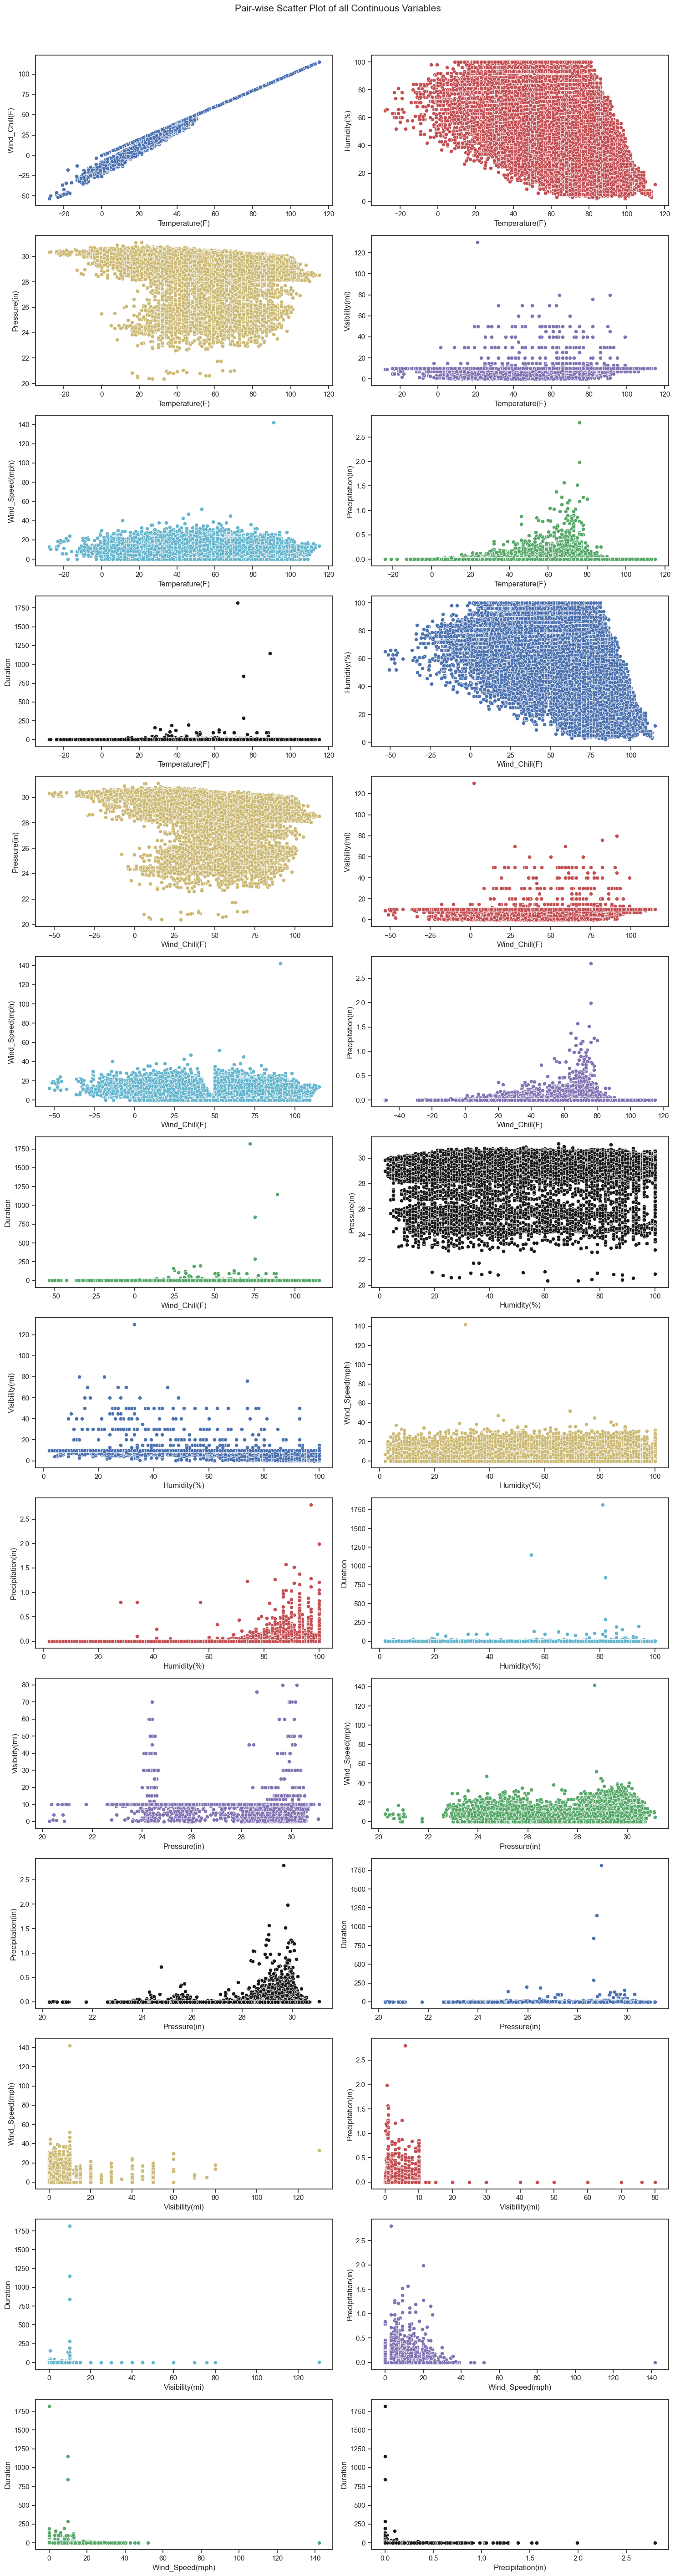

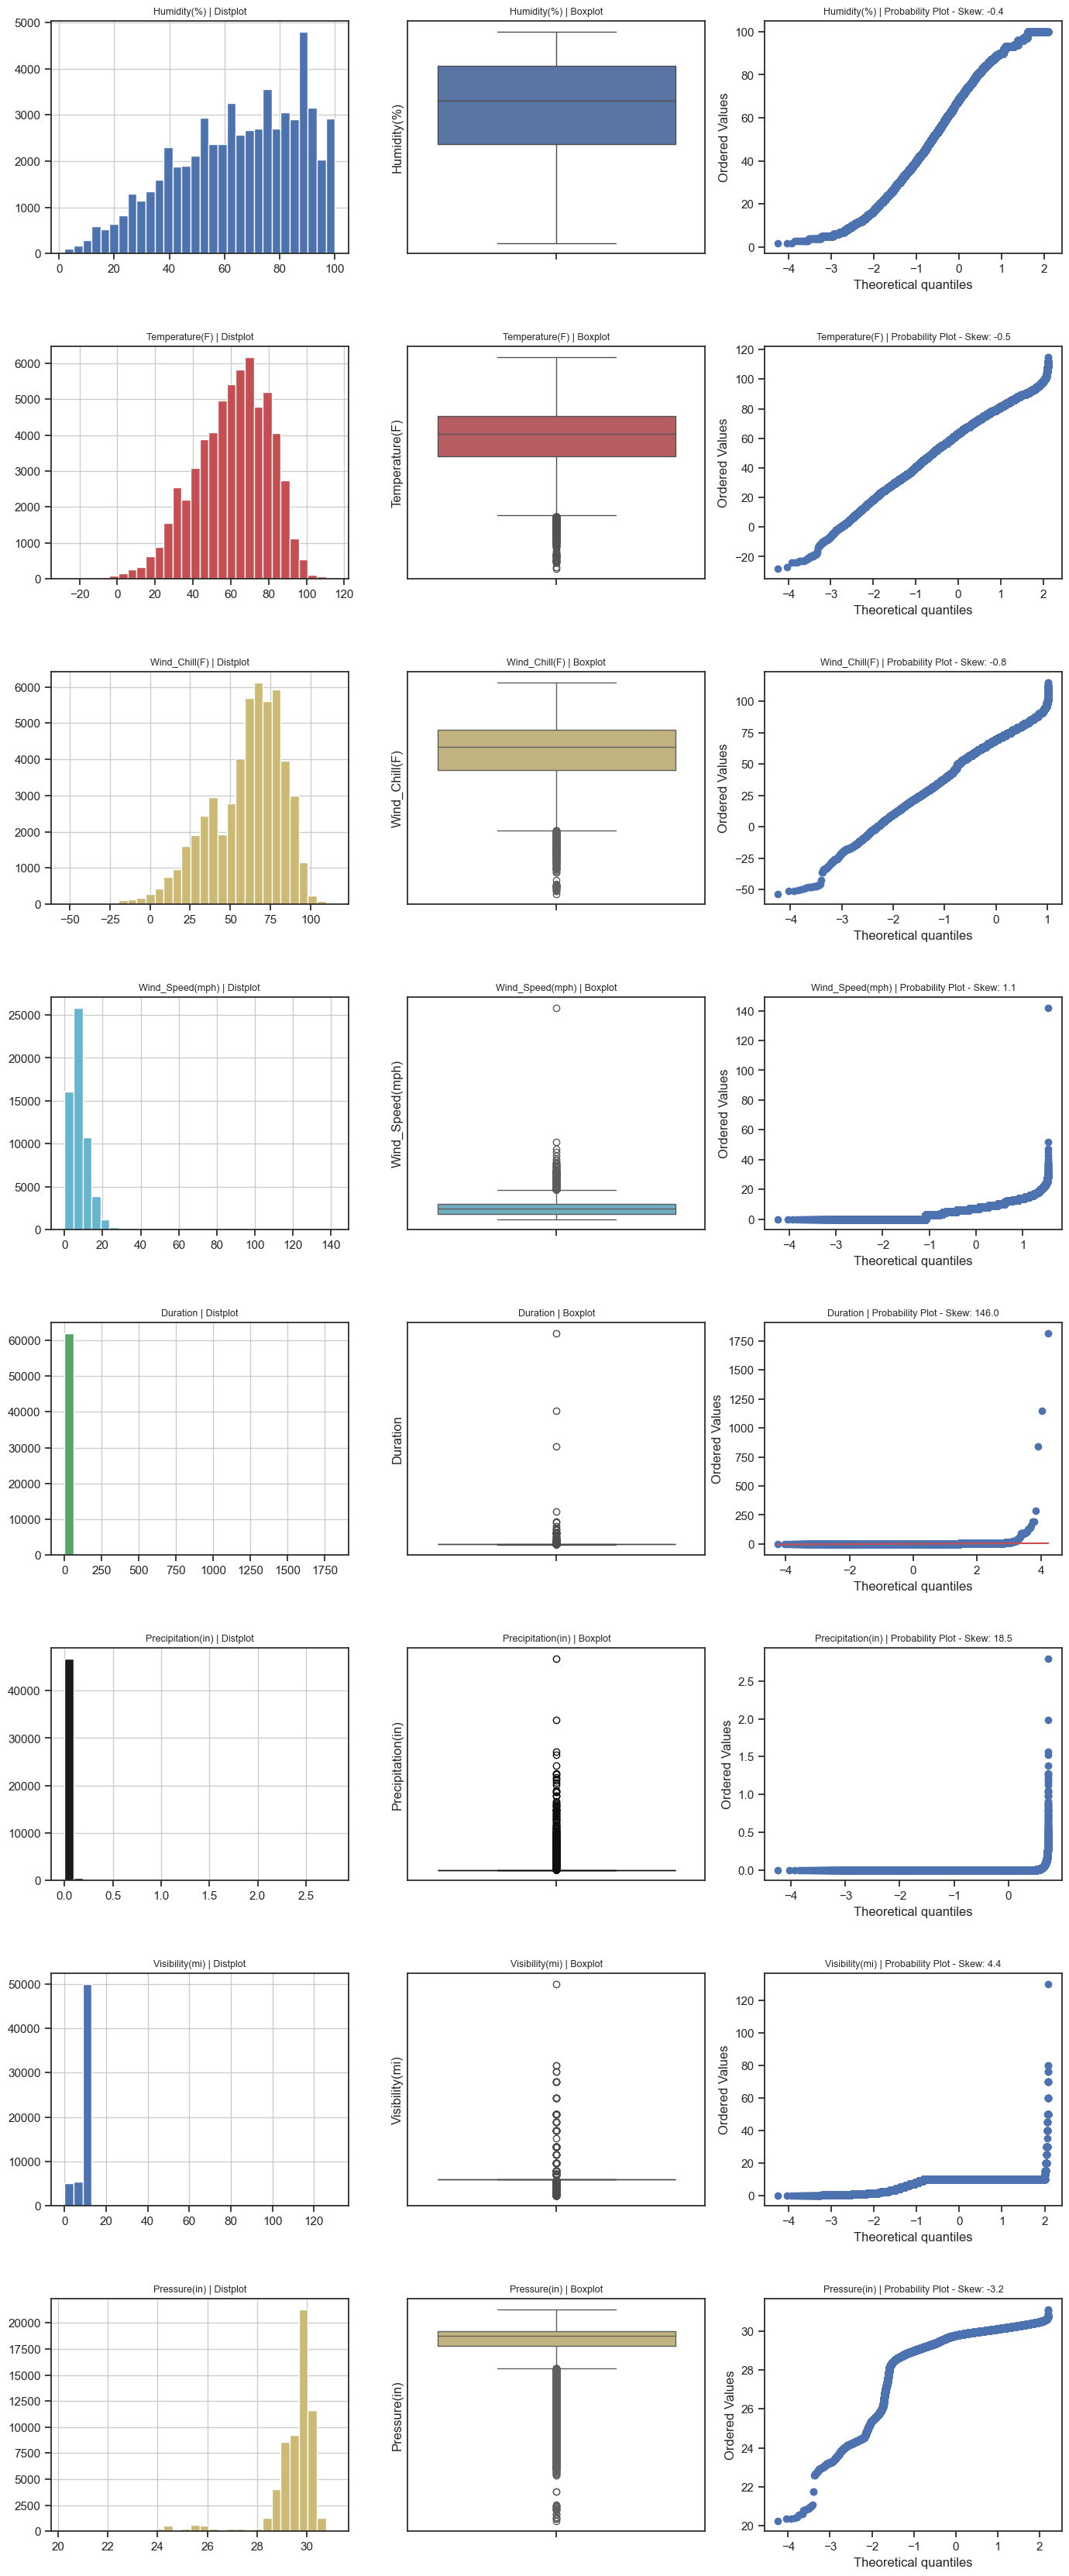

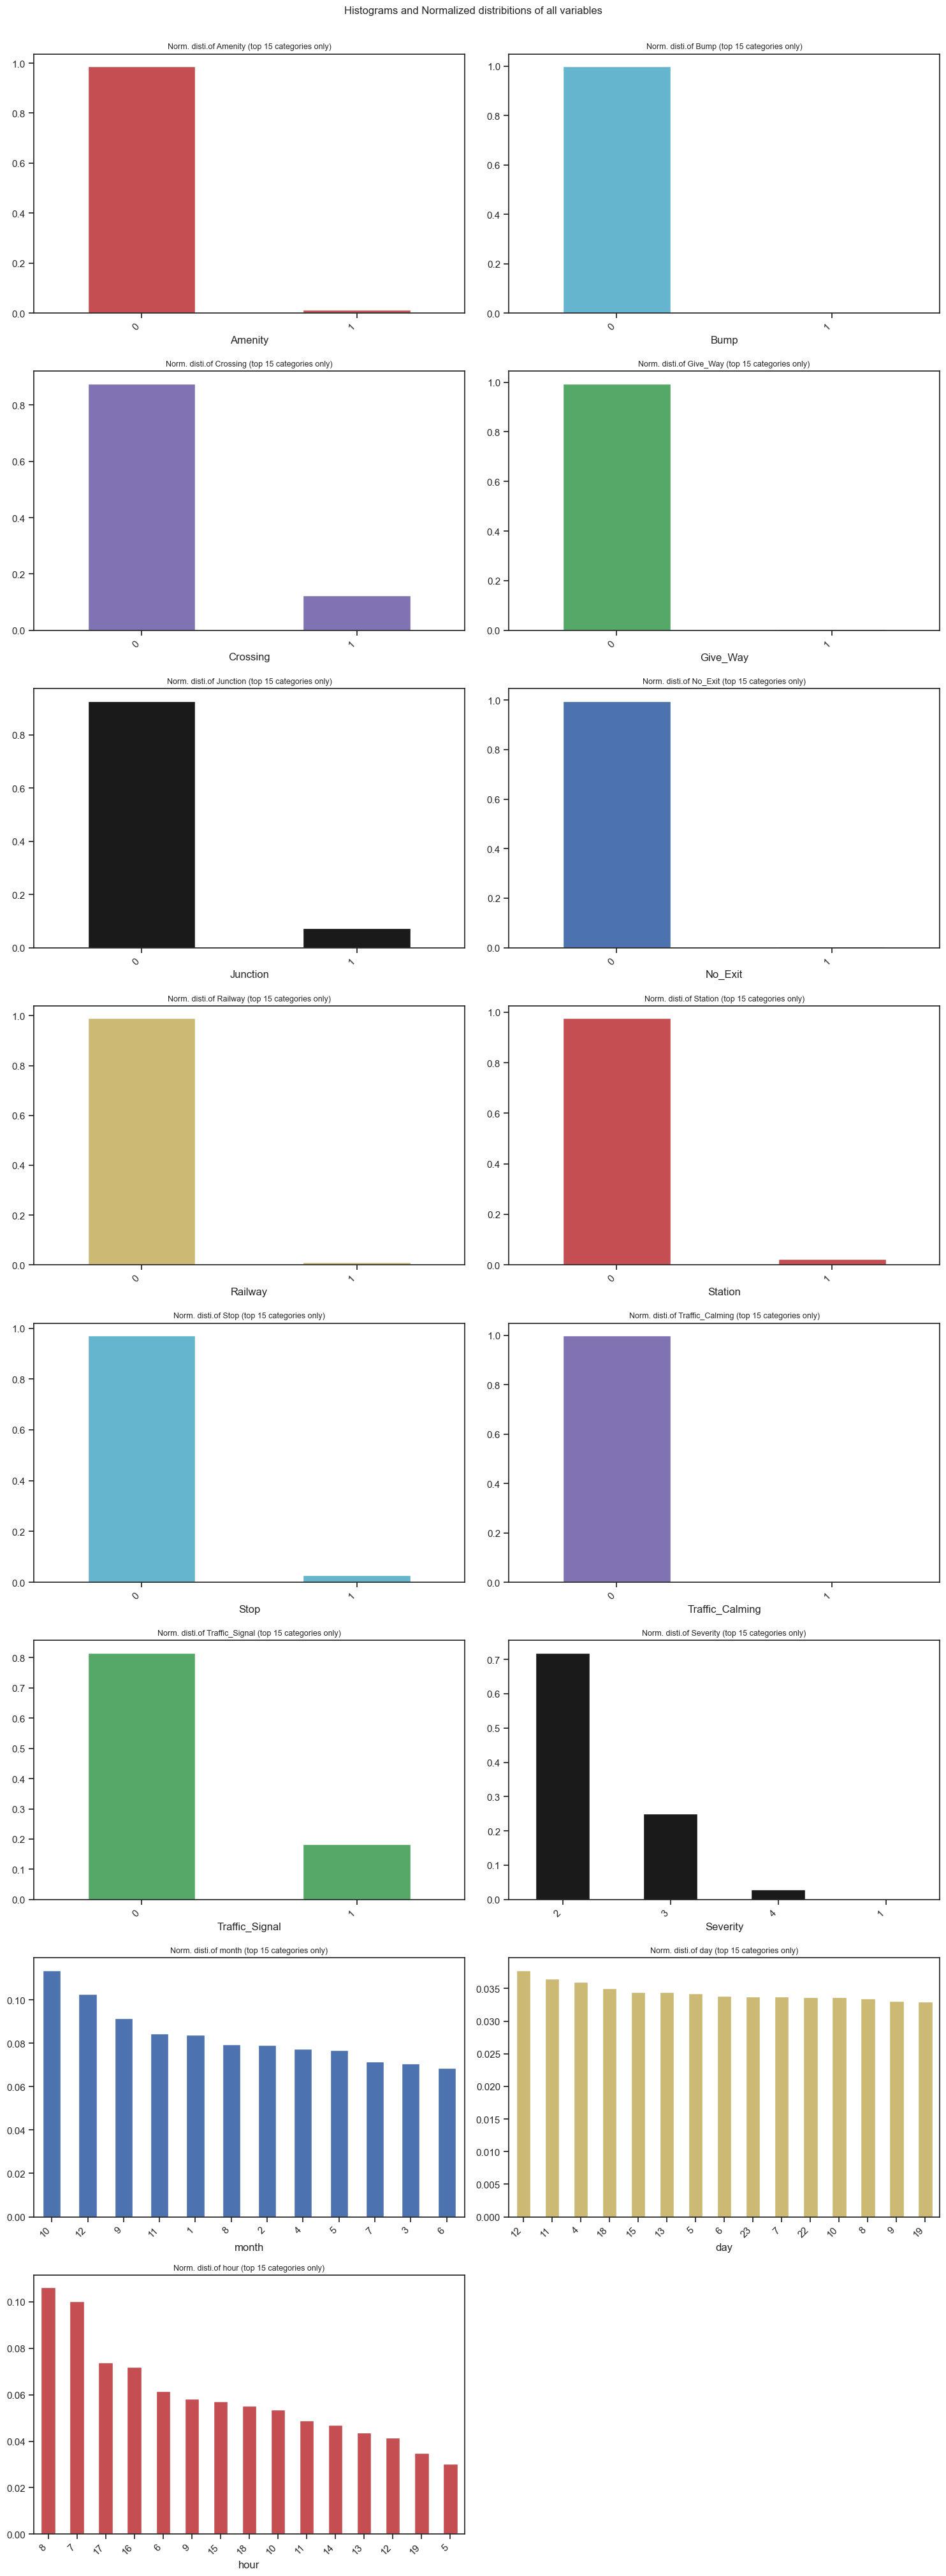

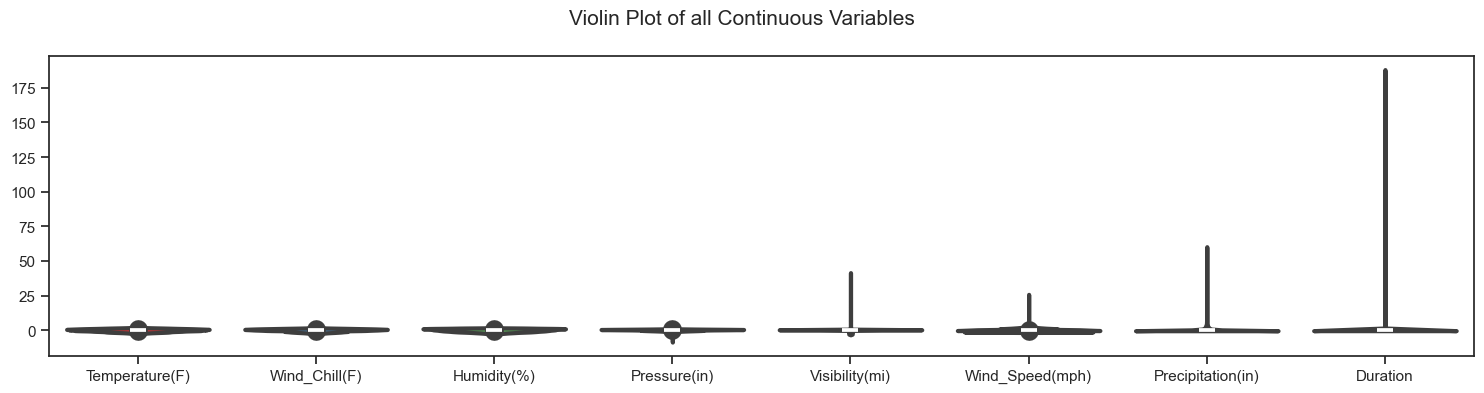

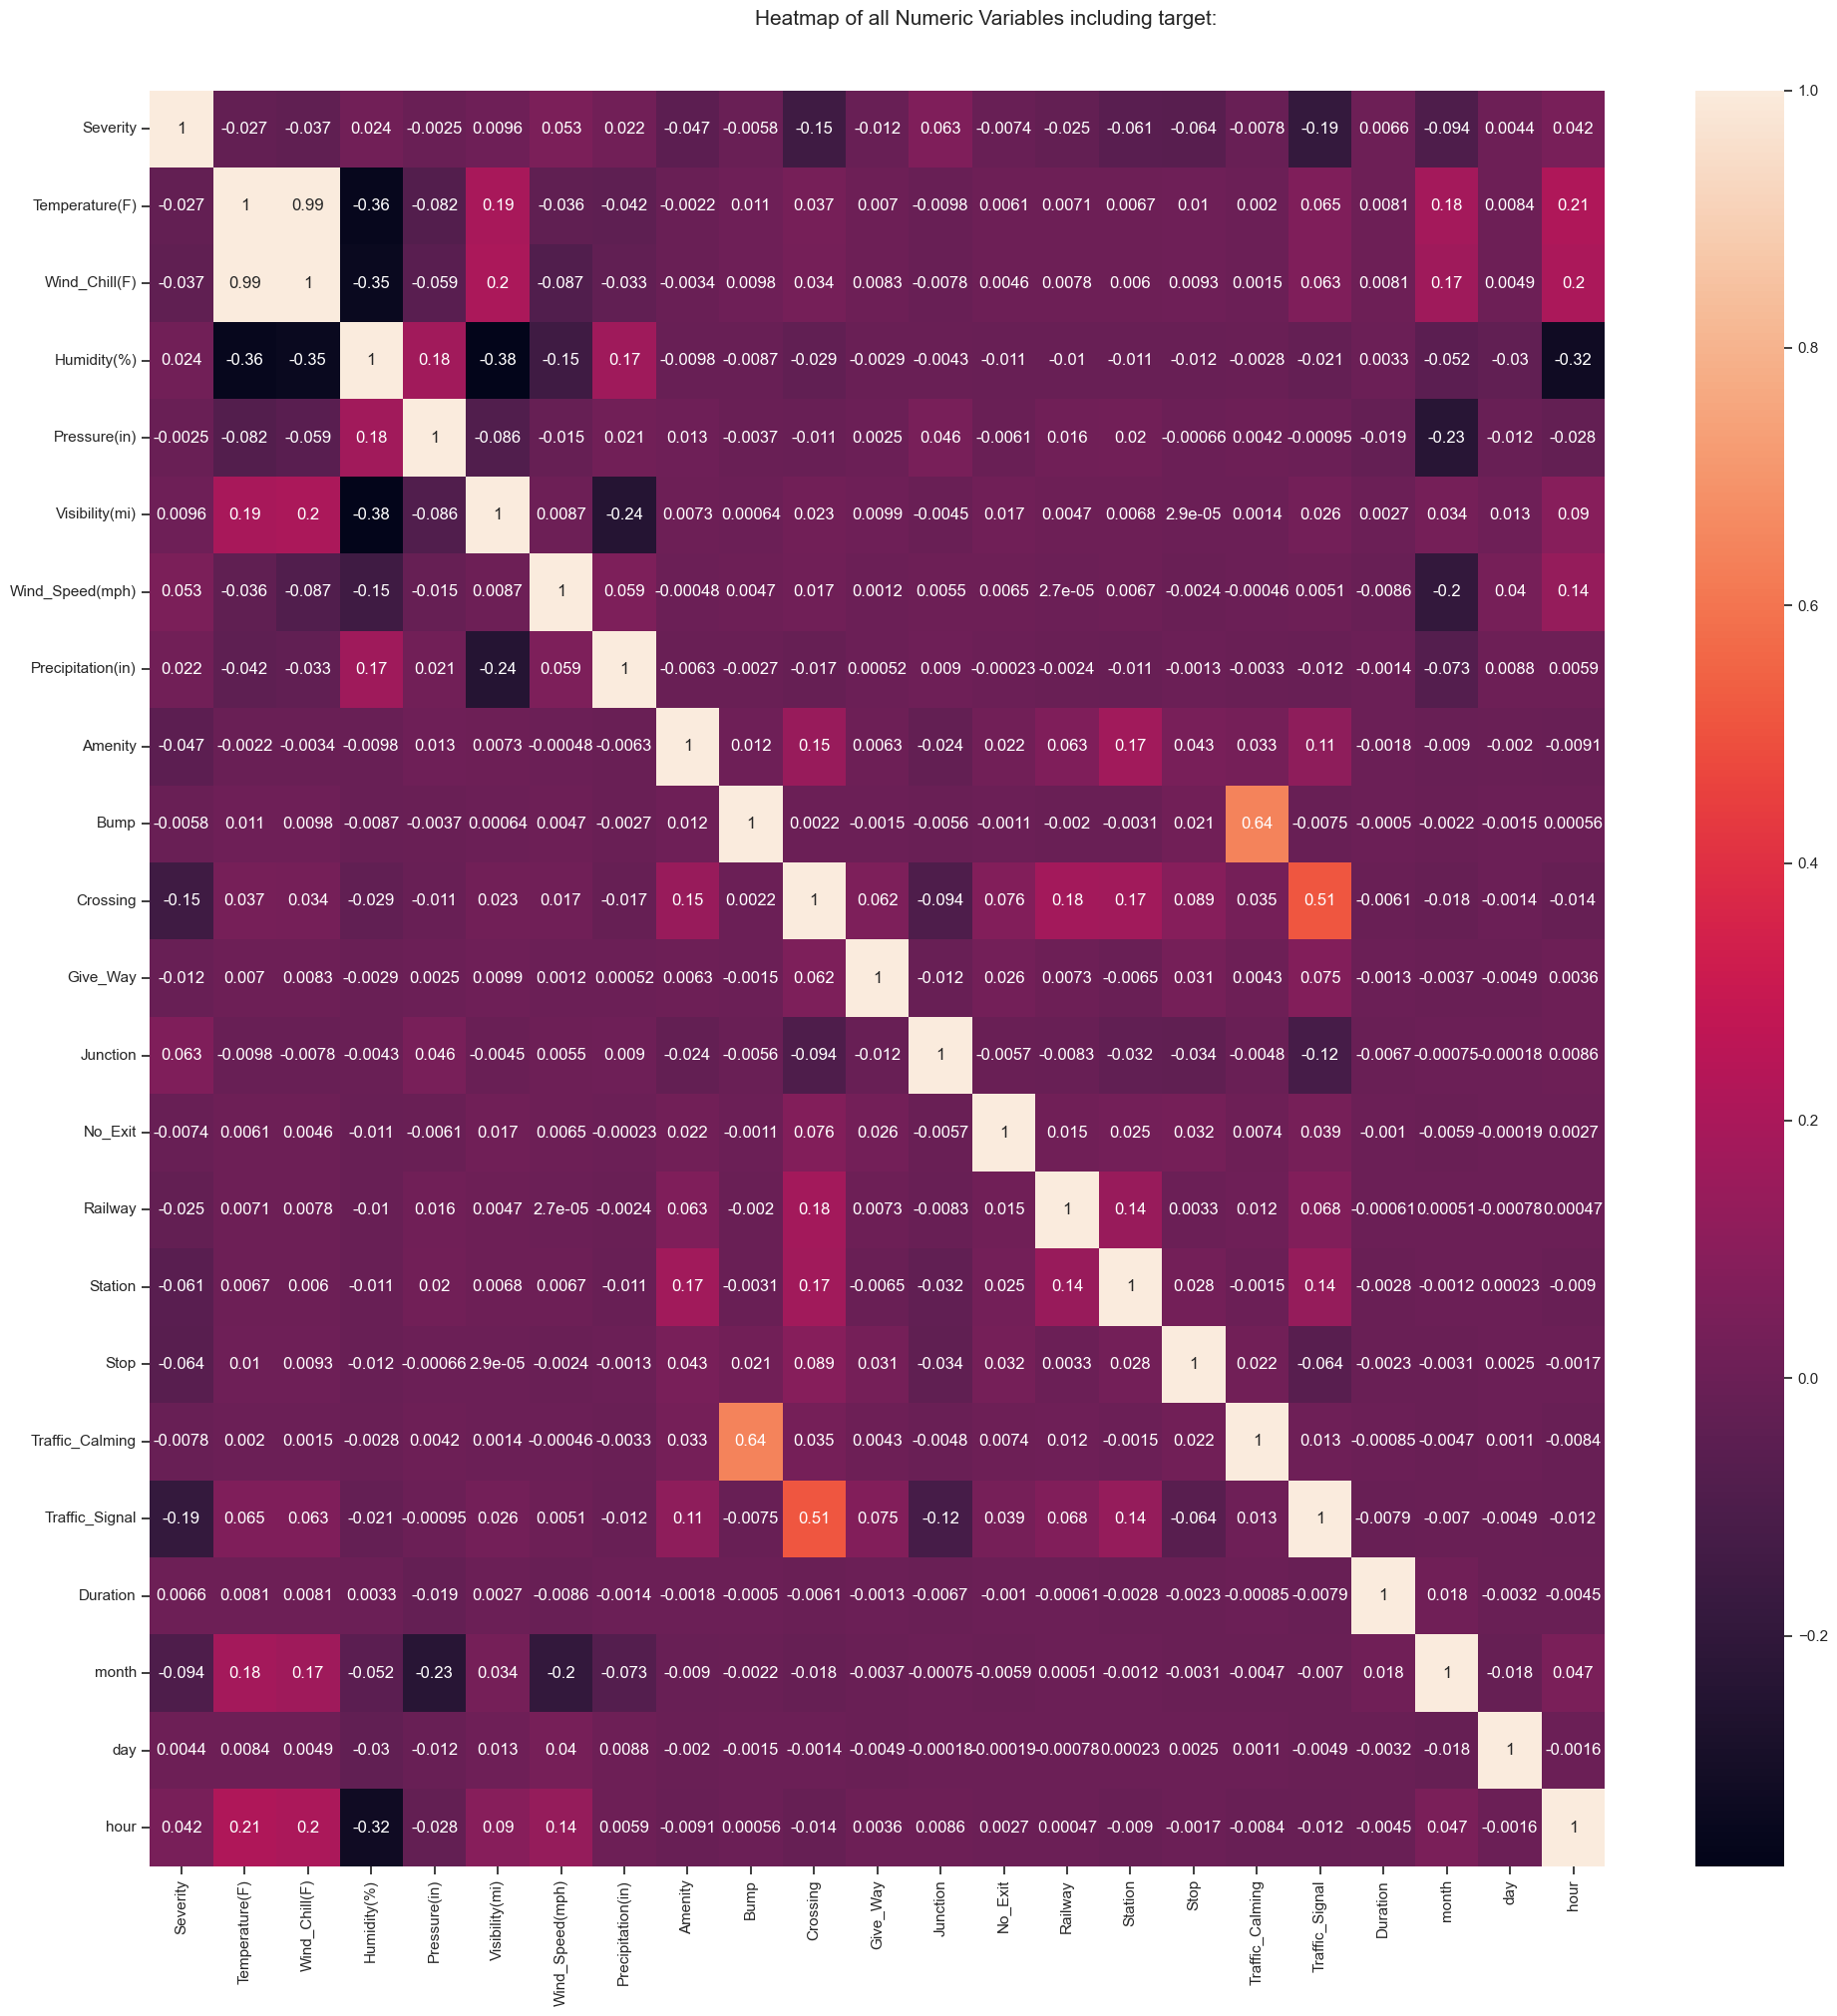

All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


ID     Source   Severity     City           County      State  \
0       A2047758  Source2      2         Zachary  East Baton Rouge   LA    
14      A2127689  Source2      2           Tempe          Maricopa   AZ    
30      A1722555  Source2      2          Denver            Denver   CO    
40      A2017804  Source2      2         Augusta          Richmond   GA    
51      A7296001  Source1      2     Minneapolis          Hennepin   MN    
...          ...      ...       ...          ...               ...   ...   
499948  A7364049  Source1      2          Madera            Madera   CA    
499971  A2142579  Source2      2       Charlotte       Mecklenburg   NC    
499975  A1679870  Source2      3     Los Angeles       Los Angeles   CA    
499980  A2239905  Source2      2       Grayslake              Lake   IL    
499994  A7376496  Source1      2          Rialto    San Bernardino   CA    

        Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0            77.0           77.0          62.0          29.92      
14           64.0           64.0          37.0          28.66      
30           18.0           11.0          40.0          24.33      
40           78.0           78.0          84.0          29.50      
51           18.0            9.0          71.0          28.87      
...                ...            ...          ...           ...   
499948       52.0           52.0          35.0          30.00      
499971       41.0           36.0          55.0          29.42      
499975       53.0           53.0          57.0          29.62      
499980       36.0           30.3          73.0          30.51      
499994       90.0           90.0           7.0          28.72      

        Visibility(mi)  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
0            10.0             5.0               0.0                    Fair    
14           10.0             7.0               0.0                    Fair    
30           10.0             5.0               0.0           Partly Cloudy    
40           10.0             6.0               0.0                    Fair    
51           10.0             7.0               0.0                    Fair    
...                ...              ...                ...               ...   
499948        9.0             5.0               0.0                    Fair    
499971       10.0             7.0               0.0                  Cloudy    
499975       10.0             6.0               0.0                  Cloudy    
499980       10.0             6.9               NaN                   Clear    
499994       10.0             8.0               0.0                    Fair    

        Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0          0       0       0         0         0        0        0      
14         0       0       1         0         0        0        0      
30         0       0       0         0         0        0        0      
40         0       0       0         0         0        0        0      
51         0       0       1         0         0        0        0      
...         ...   ...       ...       ...       ...      ...      ...   
499948     0       0       0         0         0        0        0      
499971     0       0       0         0         0        0        0      
499975     0       0       0         0         0        0        0      
499980     0       0       0         0         0        0        0      
499994     0       0       0         0         0        0        0      

        Station  Stop  Traffic_Calming  Traffic_Signal Sunrise_Sunset  \
0          0       0          0                1              Day       
14         0       0          0                1              Day       
30         0       0          0                0            Night       
40         0       0          0                1            Night       
51         0       0          0                1            Night       
...  

In [71]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
# Use AutoViz with DataFrame
AV.AutoViz('', dfte=df6)

# target value